In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

----
# Data Analysis - 02
### 선별한 통합데이터 분석
- k 값 찾기
- 상관계수
- 산포도

In [3]:
df = pd.read_csv("../Data/02.통합.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.set_index('년도', inplace=True)
df

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,빈집수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
년도,,,,,,,,,,,,
2013,경기도,12234630,1821303,112129,286,739619,NaN,7235,49143,6822,248468.3,13718.5
2013,서울특별시,10143645,1620640,84066,395,469392,NaN,6229,48097,4749,462443.1,532689.2
2013,경상남도,3333820,423864,29504,65,190166,NaN,1933,12612,1530,57288.6,6703.3
2013,부산광역시,3527635,496161,25831,82,160821,NaN,2093,13902,1510,77411.6,59554.5
2013,대구광역시,2501588,363224,19340,86,136309,NaN,1301,9981,1188,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,충청북도,1600837,226441,8607,40,85135,76877.0,1265,6103,591,28669.1,27669.5
2020,대전광역시,1463882,243418,7481,44,79807,26983.0,1240,6405,739,39341.3,38725.4
2020,강원도,1542840,217897,7835,32,73478,84106.0,1285,5554,683,22831.4,23634.2


In [4]:
df_2 = df.dropna(axis=0)
df_2

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,빈집수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
년도,,,,,,,,,,,,
2015,경기도,12522606,1898312,113495,273,733359,144893.0,6834,49285,5418,284496.7,15664.1
2015,서울특별시,10022181,1726687,83005,389,450675,79049.0,5614,44599,4307,525529.1,600391.1
2015,경상남도,3364702,450279,29537,66,187075,98680.0,1816,11822,1584,68619.5,8886.4
2015,부산광역시,3513777,520591,26645,74,154283,86626.0,1992,13133,1366,92109.5,73156.4
2015,대구광역시,2487829,364364,19438,85,129583,29610.0,1302,9664,973,61642.8,46861.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,충청북도,1600837,226441,8607,40,85135,76877.0,1265,6103,591,28669.1,27669.5
2020,대전광역시,1463882,243418,7481,44,79807,26983.0,1240,6405,739,39341.3,38725.4
2020,강원도,1542840,217897,7835,32,73478,84106.0,1285,5554,683,22831.4,23634.2


In [5]:
df[df.index == 2014]

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,빈집수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
년도,,,,,,,,,,,,
2014,경기도,12357830,1834379,112169,277,732307,NaN,7309,51661,5368,268494.6,14808.7
2014,서울특별시,10103233,1661425,83711,392,457517,NaN,6262,50223,4388,494441.9,565416.1
2014,경상남도,3350257,456164,29763,64,186973,NaN,1965,12751,1725,62681.3,7638.4
2014,부산광역시,3519401,500802,26190,77,155754,NaN,2107,14569,1263,84345.8,67846.8
2014,대구광역시,2493264,365739,19361,85,131765,NaN,1453,10744,1064,53214.0,42203.2
2014,인천광역시,2902608,442973,25786,67,156740,NaN,1698,11938,1049,66365.0,32603.1
2014,전라북도,1871560,276900,14231,54,101860,NaN,1036,7545,763,24625.9,17303.3
2014,경상북도,2700794,338029,22062,55,131307,NaN,1492,9728,972,31642.7,37942.2
2014,광주광역시,1475884,246043,12729,43,93163,NaN,1090,6781,911,24782.2,19139.3


----
## k-means -> 년도별 최적의 k값 찾기

In [6]:
# plt.style.use('ggplot')

# fig = plt.figure(figsize=(20, 5))
# ax = fig.add_subplot(1,1,1)

# ax.plot(
#     df_3.columns,
#     df_3.loc['충청남도'],
#     marker = 'o',
#     markerfacecolor = 'green',
#     markersize = 10,
#     color = 'olive',
#     lw = 2, # linewidth
#     label = '서울->충남'
# )

# ax.plot(
#     df_3.columns,
#     df_3.loc['경상북도'],
#     marker = 'o',
#     markerfacecolor = 'blue',
#     markersize = 10,
#     color = 'skyblue',
#     lw = 2, # linewidth
#     label = '서울->충남'

# )
# ax.plot(
#     df_3.columns,
#     df_3.loc['강원도'],
#     marker = 'o',
#     markerfacecolor = 'red',
#     markersize = 10,
#     color = 'pink',
#     lw = 2, # linewidth
#     label = '서울->충남'
# )

# ax.legend(loc='best')
# ax.set_title('서울->충남, 경북, 강원 인구 이동', size=20)
# ax.set_xlabel('기간', size=12)
# ax.set_ylabel('유동 인구수', size=12)
# ax.set_xticklabels(df_3.columns, rotation=90)

# ax.tick_params(axis='x', labelsize=10) # 해도그만 안해도그만

# plt.show()

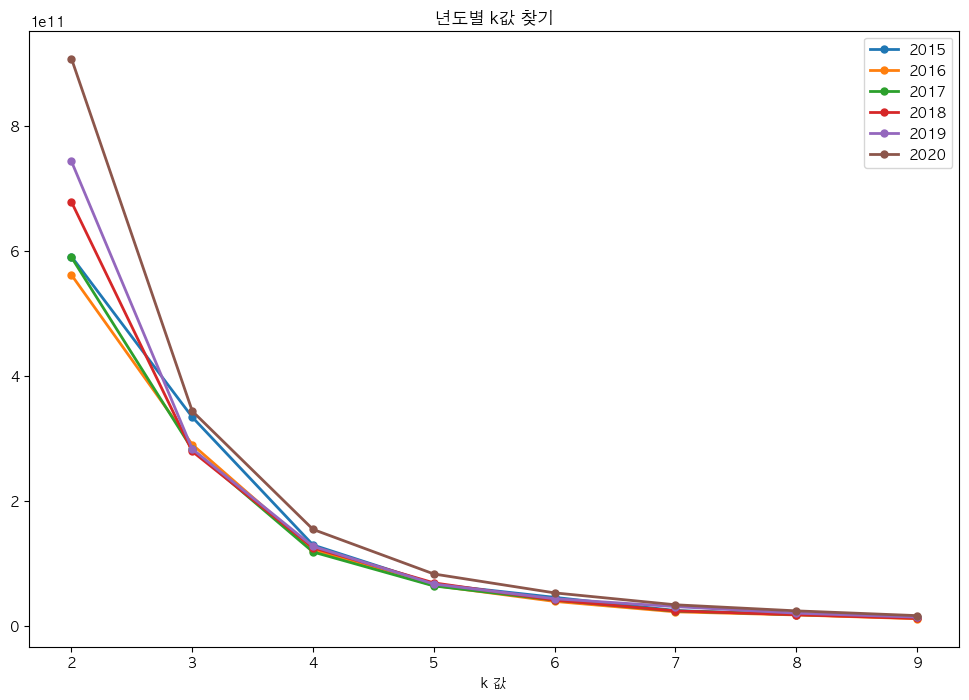

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

for year in range(2015, 2021):
    df_temp = df[df.index == year]
    df_temp.set_index('시도', inplace=True)
    df_km = df_temp[df_temp.columns.difference(['총인구'])]
    # k값 찾기 --------------------------------------------
    scores = []
    for k in range(2, 10):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(df_km)
        scores.append(km.inertia_)
    # 그래프 그리기 ------------------
    ax.plot(range(2,10), scores, label = year, lw=2, marker='o', markersize = 5)

ax.set_title("년도별 k값 찾기")
ax.legend(loc='best')
ax.set_xlabel("k 값")
plt.show()
# -----------------------------

> ### [4, 5] 에서 [3, 4, 5]로 변화
> ### 결과 : 3, 4, 5

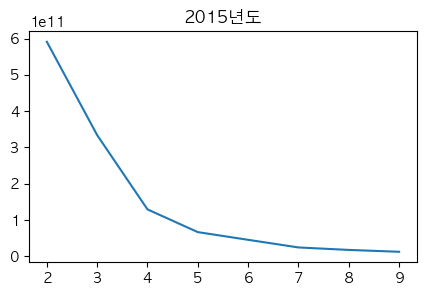

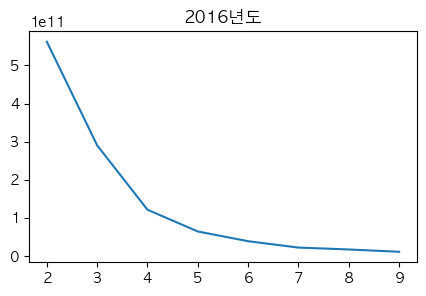

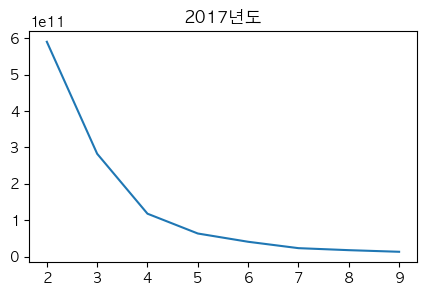

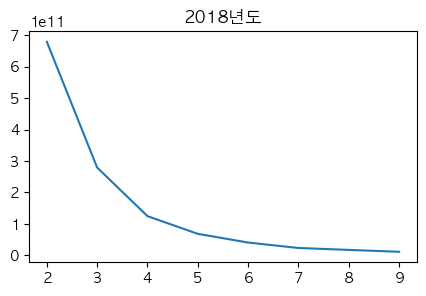

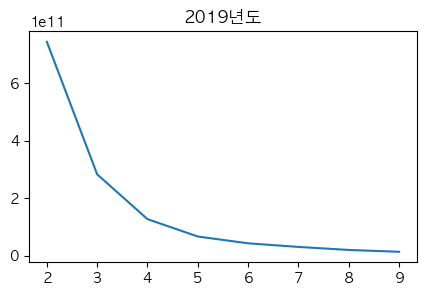

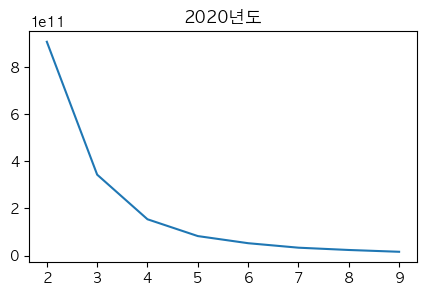

In [9]:
for year in range(2015, 2021):
    df_temp = df[df.index == year]
    df_temp.set_index('시도', inplace=True)
    df_km = df_temp[df_temp.columns.difference(['총인구'])]
    # k값 찾기 --------------------------------------------
    scores = []
    for k in range(2, 10):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(df_km)
        scores.append(km.inertia_)
    # 그래프 그리기 ------------------
    plt.figure(figsize=(5,3))
    plt.plot(range(2,10), scores)
    plt.title(f'{year}년도')
    plt.show()
    # -----------------------------

----
## 전체 년도의 k값 찾기

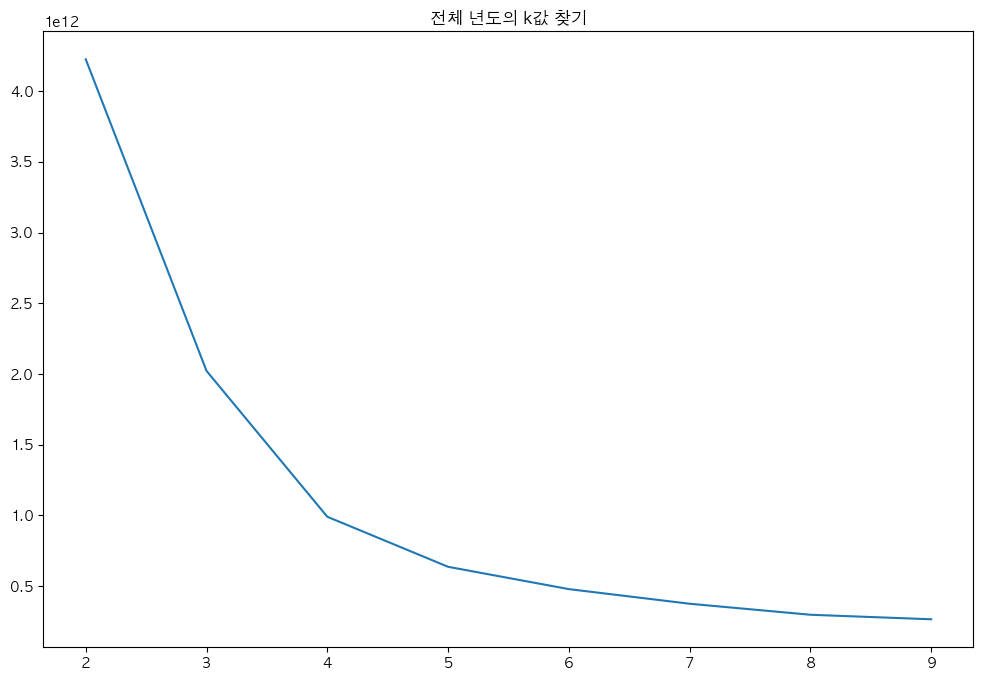

In [10]:
df_temp = df.dropna(axis=0)
df_temp.set_index('시도', inplace=True)
df_km = df_temp[df_temp.columns.difference(['총인구'])]
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_km)
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(12,8))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

> ### 결과 : 3, 4, 5

----
## 상관계수

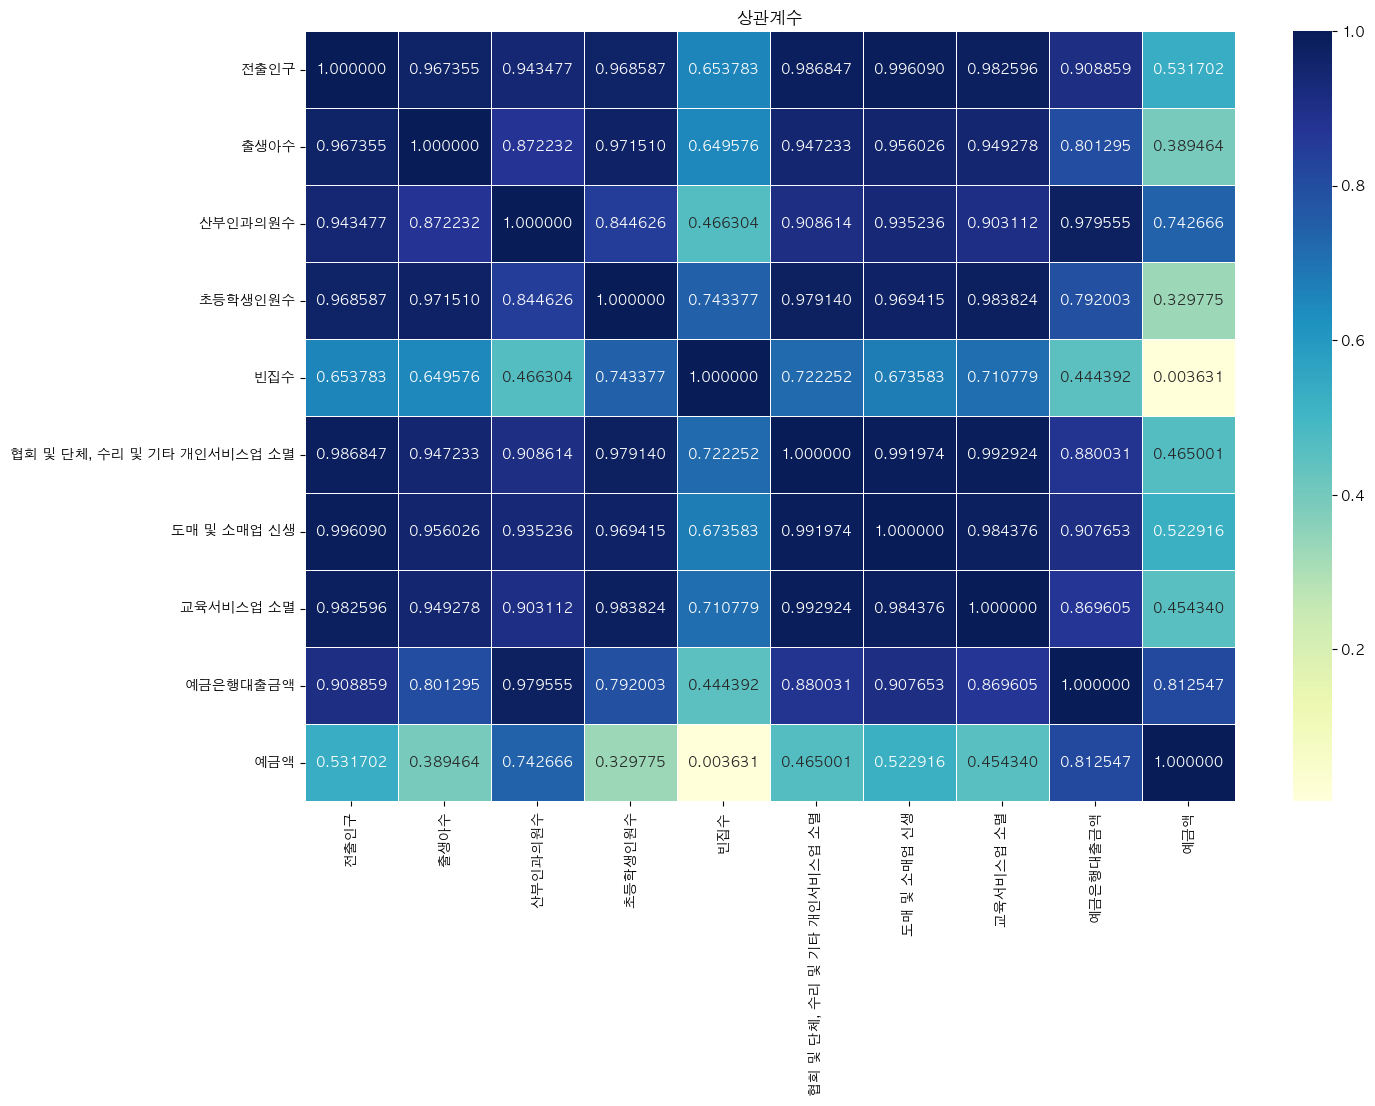

In [11]:
target_col = df_2.columns[2:]
plt.figure(figsize=(15,10))
sns.heatmap(
    df_2[target_col].corr(),
    annot = True, # True로 해야 숫자가 보임
    fmt = 'f', # 실수
    cmap='YlGnBu',
    linewidth = 0.5
)
plt.title('상관계수')
# plt.xticks(rotation=15)
plt.show()

----
## 산포도 전체

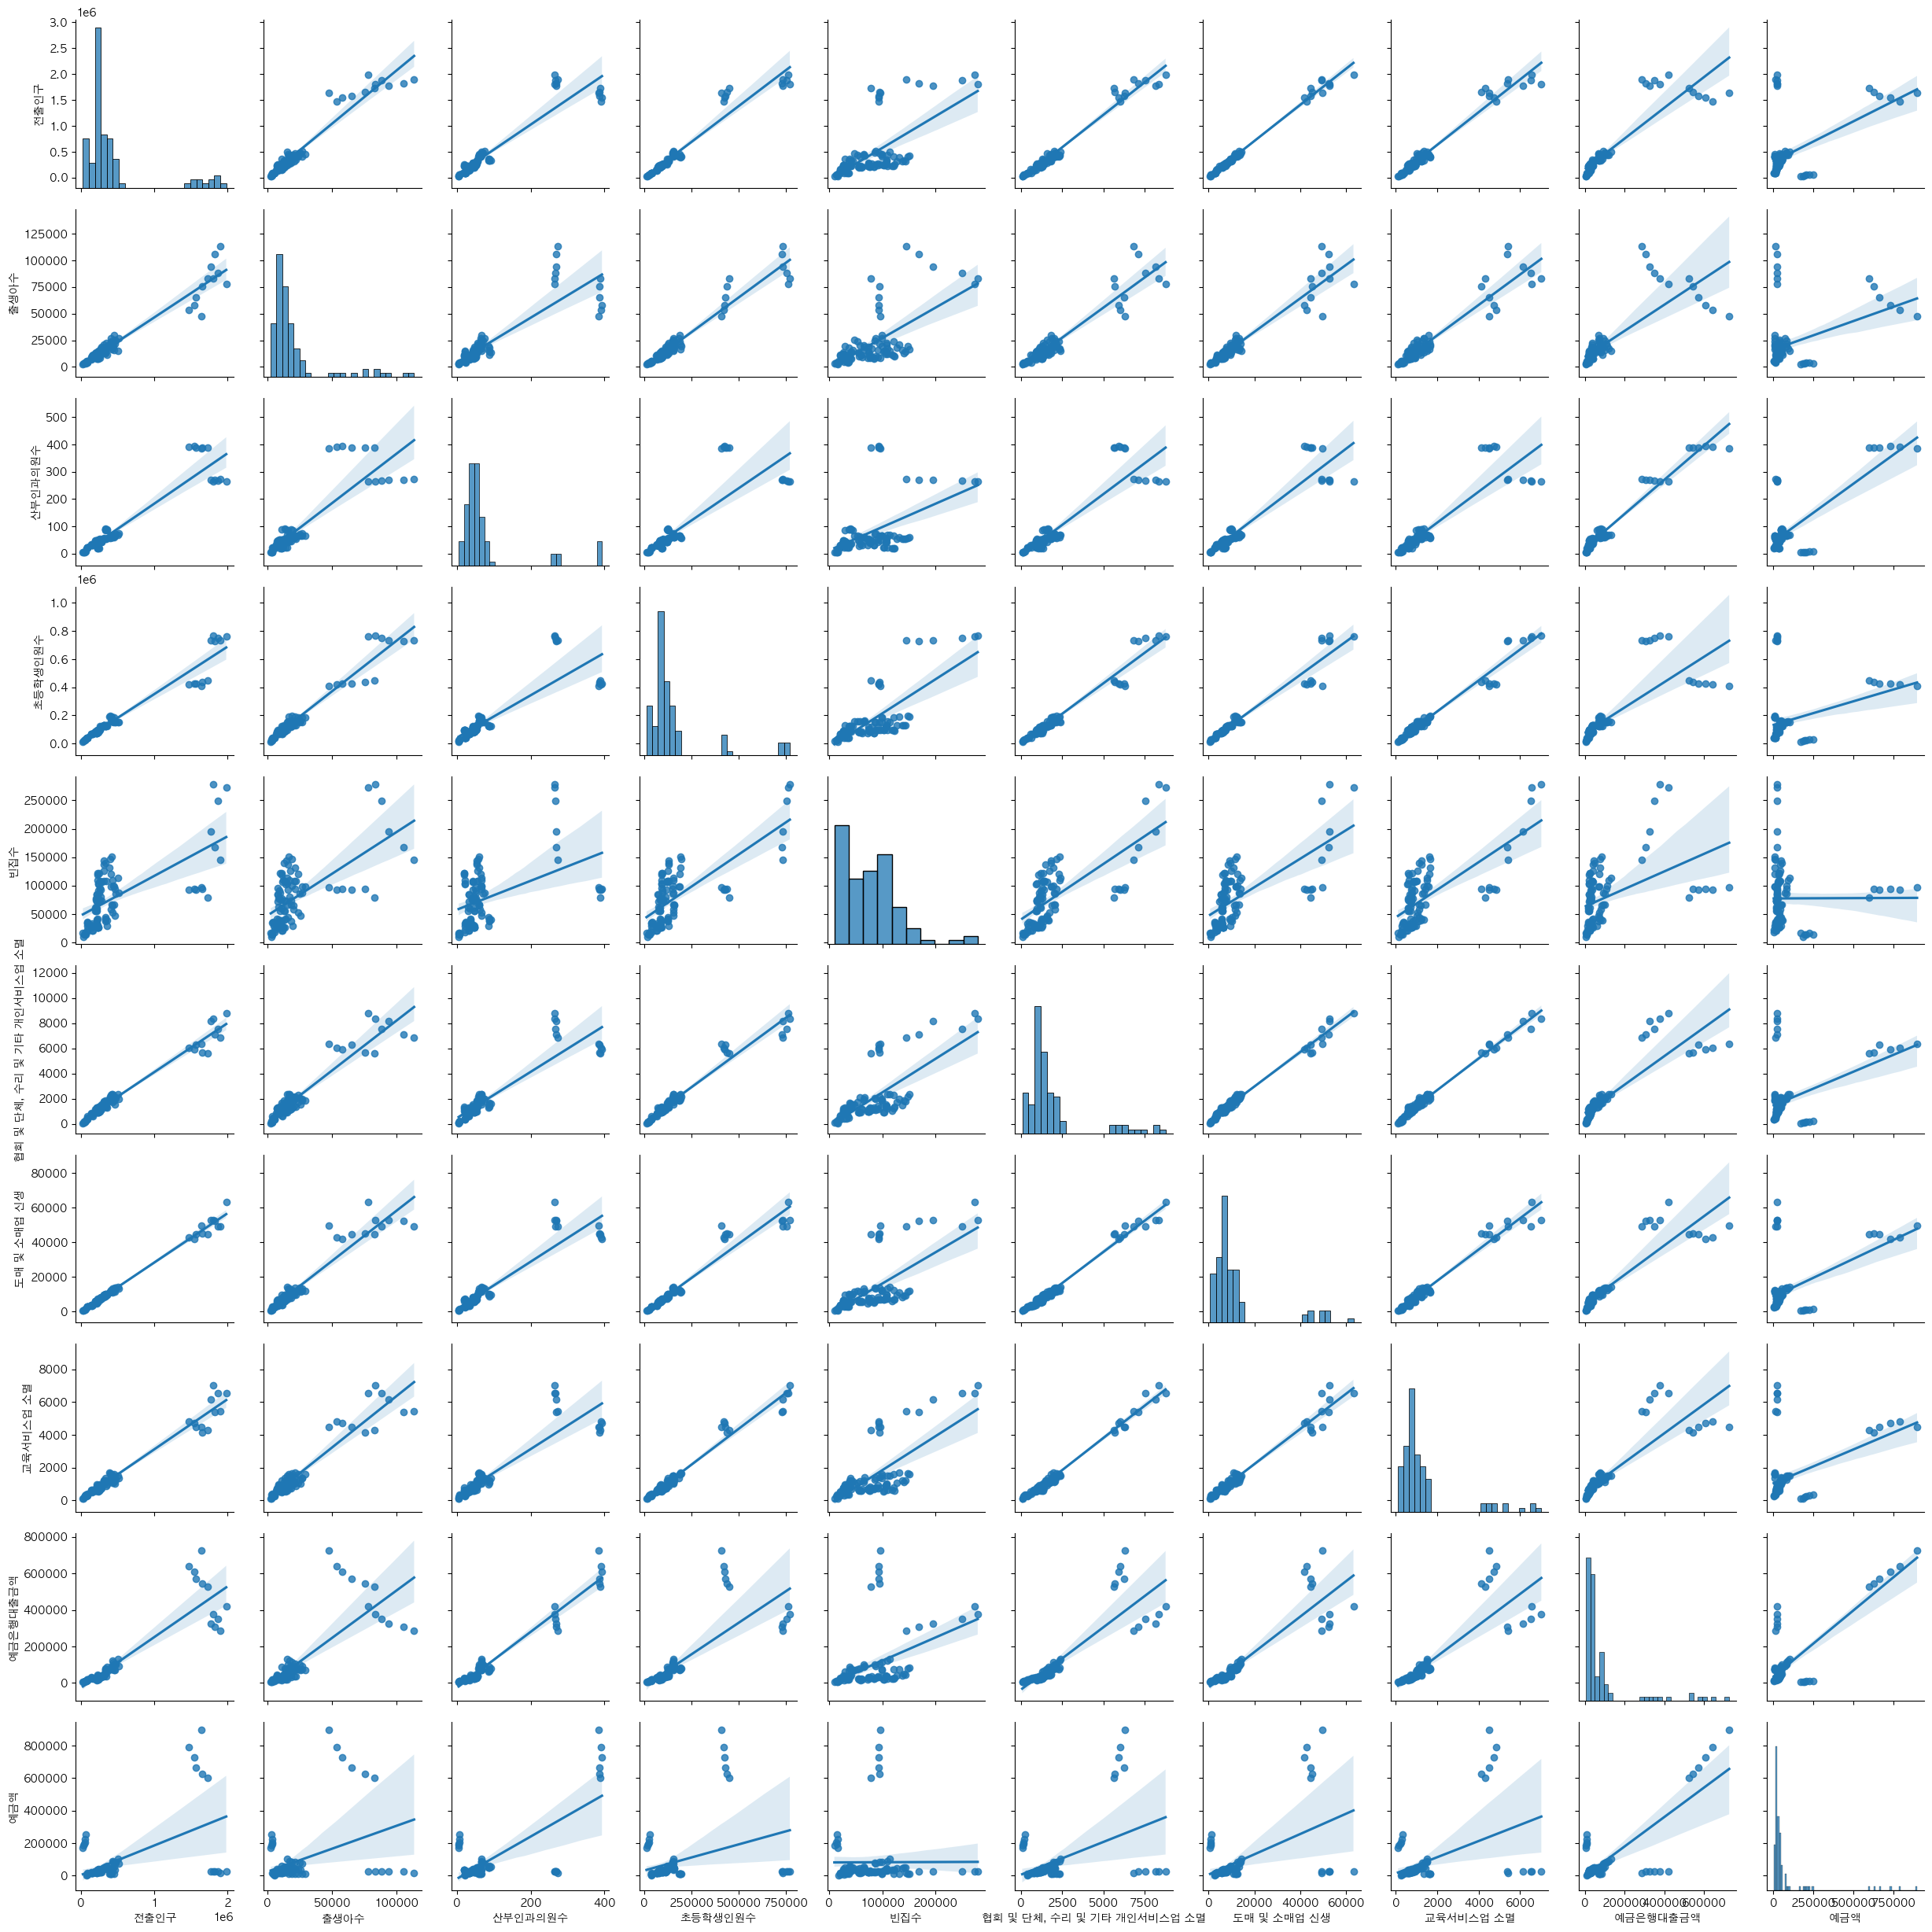

In [12]:
# 총 인구, 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
sns.pairplot(
    df_2.iloc[:,2:],
    vars = df_2.columns[2:],
    kind = 'reg'
)
plt.show()